<a href="https://colab.research.google.com/github/hyunaeee/PR_semantic_image_segmentation_unet/blob/main/BNCS401_PCA_vs_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

#MNIST

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = tf.reshape(X_train_full, (X_train_full.shape[0], -1)).numpy()
X_test = tf.reshape(X_test, (X_test.shape[0], -1)).numpy()

X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

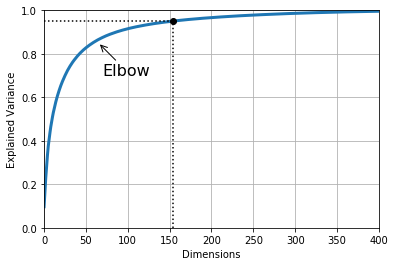

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=154)
X_train_2D = pca.fit_transform(X_train)
X_train_recon = pca.inverse_transform(X_train_2D)

In [ ]:
def plot_input_recon(original, reconstructed):
  plt.figure(figsize=(7, 4))
  plt.subplot(121)
  plot_digits(original)
  plt.title("Original", fontsize=16)
  plt.subplot(122)
  plot_digits(reconstructed)
  plt.title("Compressed", fontsize=16)

In [ ]:
def scatter_compressed(compression, color_label):
  plt.figure(figsize=(6,6))
  plt.scatter(compression[:, 0], compression[:, 1], c=color_label, cmap="jet")
  plt.axis('off')
  plt.colorbar()
  plt.show()

**Write your code to reduce into 2D with PCA**

In [ ]:
# your code

**Write your code to implement a two-layer neural network for dimension reduction**

In [ ]:
from tensorflow import keras

model = keras.Sequential()
# Build your architecture here
#mdel find

# Set the name of the hidden layer to be "compression"
#X_train compile find
# Train your model with "X_train"
#Train model find

In [ ]:
compression_layer = keras.Model([model.layers[0].input], [model.get_layer("compression").output])
X_train_NN_2D = compression_layer.predict(X_train)
reconstructed_NN = model.predict(X_train)

Write your code to implement a deep neural network (e.g., 784-200-100-50-2-50-100-200-784) for dimension reduction

In [ ]:
deep_model = keras.Sequential()
# Build your architecture here
# Set the name of the intermediate layer (with 2 units) to be "compression"

# Train your model with "X_train"

In [ ]:
deep_compression_layer = keras.Model([deep_model.layers[0].input], [deep_model.get_layer("compression").output])
X_train_deepNN_2D = deep_compression_layer.predict(X_train)
reconstructed_deepNN = deep_model.predict(X_train)

In [ ]:
plot_input_recon(X_train[::2100], X_train_recon[::2100])
plot_input_recon(X_train[::2100], reconstructed_NN[::2100])
plot_input_recon(X_train[::2100], reconstructed_deepNN[::2100])

In [ ]:
scatter_compressed(X_train_2D, y_train)
scatter_compressed(X_train_NN_2D, y_train)
scatter_compressed(X_train_deepNN_2D, y_train)